**SVM for Breast Cancer Classification**

Importing Required Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Loading Dataset

In [11]:
!unzip "/content/archive (7).zip"

Archive:  /content/archive (7).zip
replace breast-cancer.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [29]:
df = pd.read_csv('/content/breast-cancer.csv')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.drop(['id'], axis=1, inplace=True)

In [13]:
for col in ['id', 'Unnamed: 32']:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

In [22]:
if 'diagnosis' in df.columns:
    target_column = 'diagnosis'
elif 'target' in df.columns:
    target_column = 'target'
else:
    raise KeyError("No valid target column found. Use 'diagnosis' or 'target' in your CSV.")

In [15]:
X = df.drop(target_column, axis=1)
y = df[target_column]

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [38]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\\n", confusion_matrix(y_test, y_pred_linear))
print("Classification Report:\\n", classification_report(y_test, y_pred_linear))

Linear SVM Accuracy: 0.956140350877193
Confusion Matrix:\n [[68  3]
 [ 2 41]]
Classification Report:\n               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

Linear SVM Accuracy: 0.956140350877193
Confusion Matrix:
 [[68  3]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [21]:
display(y.isnull().sum())

np.int64(569)

In [30]:
X = df.drop(target_column, axis=1)
y = df[target_column]

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
display(df['diagnosis'].isnull().sum())

np.int64(569)

In [34]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))

RBF SVM Accuracy: 0.9736842105263158
Confusion Matrix:
 [[70  1]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [35]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found by GridSearchCV:")
display(grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [36]:
best_svm = grid_search.best_estimator_
scores = cross_val_score(best_svm, X_scaled, y, cv=5)

print("Cross-validation accuracy scores:", scores)
print("Mean cross-validation accuracy:", scores.mean())

Cross-validation accuracy scores: [0.97368421 0.97368421 0.98245614 0.97368421 0.99115044]
Mean cross-validation accuracy: 0.9789318428815401


In [39]:
# Select two features for visualization (e.g., 'radius_mean' and 'texture_mean')
# You can change these features to visualize different aspects of the decision boundary
feature1_index = X.columns.get_loc('radius_mean')
feature2_index = X.columns.get_loc('texture_mean')

X_vis = X_scaled[:, [feature1_index, feature2_index]]

# Train a new SVM model with the best parameters on the selected two features
best_svm_vis = SVC(kernel='rbf', C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
best_svm_vis.fit(X_vis, y)

# Create a meshgrid to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the class for each point in the meshgrid
Z = best_svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)



Plot the decision boundary and the data points

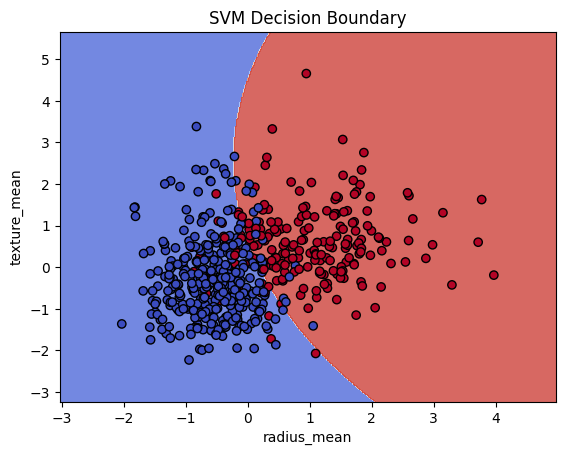

In [40]:
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel(X.columns[feature1_index])
plt.ylabel(X.columns[feature2_index])
plt.title('SVM Decision Boundary')
plt.show()

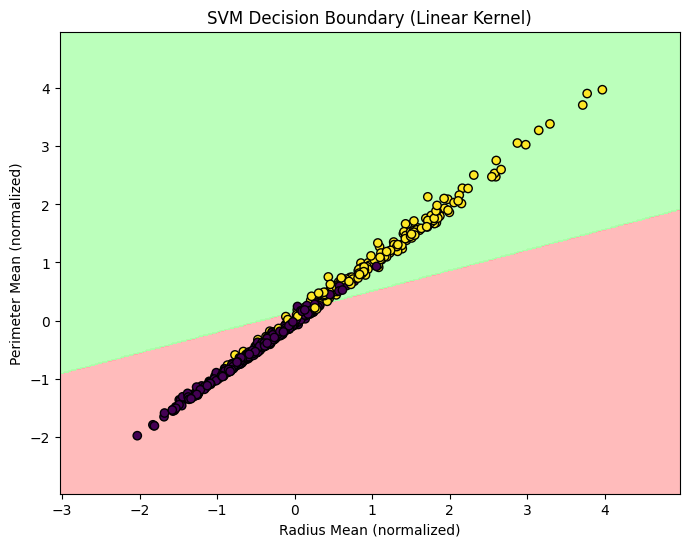

In [43]:
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='k')
plt.xlabel("Radius Mean (normalized)")
plt.ylabel("Perimeter Mean (normalized)")
plt.title("SVM Decision Boundary (Linear Kernel)")
plt.show()